In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
##質問すること　label_encodingとone_hot_encodingについて


In [2]:
import os

# 現在のディレクトリ取得
current_directory = os.getcwd()

# 一つ前のディレクトリへ移動
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))

# CSVファイルのパス
csv_path = os.path.join(parent_directory, 'test.csv')  # ファイル名.csvは実際のファイル名に置き換えてください

# CSVファイルを読み込む
df_apartment = pd.read_csv(csv_path)

df_apartment

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
0,1000068,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１１丁目,2,３ＬＤＫ,...,その他,NaN,NaN,NaN,商業地域,80.0,600.0,2022年第4四半期,未改装,NaN
1,1000107,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,5,NaN,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2023年第1四半期,NaN,NaN
2,1000109,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,0,１Ｒ＋Ｓ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2022年第4四半期,未改装,NaN
3,1000110,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,西１８丁目,2,３ＬＤＫ,...,住宅,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2022年第4四半期,未改装,NaN
4,1000287,中古マンション等,NaN,1101,北海道,札幌市中央区,大通西,円山公園,1,３ＬＤＫ,...,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2023年第1四半期,改装済,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19266,47004942,中古マンション等,NaN,47211,沖縄県,沖縄市,胡屋,NaN,NaN,１ＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2022年第4四半期,未改装,NaN
19267,47005056,中古マンション等,NaN,47211,沖縄県,沖縄市,知花,NaN,NaN,２ＬＤＫ,...,住宅,NaN,NaN,NaN,市街化区域及び市街化調整区域外の都市計画区域,70.0,200.0,2023年第1四半期,改装済,NaN
19268,47005318,中古マンション等,NaN,47211,沖縄県,沖縄市,美里,NaN,NaN,４ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2023年第1四半期,未改装,NaN
19269,47005319,中古マンション等,NaN,47211,沖縄県,沖縄市,美里,NaN,NaN,２ＬＤＫ,...,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2023年第1四半期,改装済,NaN


In [68]:
pd.options.display.max_columns=27
df_apartment.query('都道府県名=="山形県"')

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等
856,6000002,中古マンション等,NaN,6201,山形県,山形市,相生町,山形,23,１ＬＤＫ,35,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2023年第1四半期,未改装,NaN
857,6000682,中古マンション等,NaN,6201,山形県,山形市,北町,北山形,13,４ＬＤＫ,75,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,工業地域,60.0,200.0,2022年第4四半期,未改装,NaN
858,6000699,中古マンション等,NaN,6201,山形県,山形市,木の実町,山形,13,３ＬＤＫ,70,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2023年第1四半期,改装済,NaN
859,6000701,中古マンション等,NaN,6201,山形県,山形市,木の実町,山形,13,３ＬＤＫ,70,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2022年第4四半期,改装済,NaN
860,6000702,中古マンション等,NaN,6201,山形県,山形市,木の実町,山形,10,３ＬＤＫ,65,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2022年第4四半期,未改装,NaN
861,6000703,中古マンション等,NaN,6201,山形県,山形市,木の実町,山形,10,１ＬＤＫ,65,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2022年第4四半期,未改装,NaN
862,6000859,中古マンション等,NaN,6201,山形県,山形市,小白川町,山形,30分?60分,３ＬＤＫ,65,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2022年第4四半期,未改装,NaN
863,6001632,中古マンション等,NaN,6201,山形県,山形市,十日町,山形,8,２ＬＤＫ,55,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,500.0,2022年第4四半期,未改装,NaN
864,6001695,中古マンション等,NaN,6201,山形県,山形市,銅町,北山形,19,３ＬＤＫ,60,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,第１種住居地域,60.0,200.0,2022年第4四半期,改装済,NaN
865,6002049,中古マンション等,NaN,6201,山形県,山形市,旅篭町,山形,15,４ＬＤＫ,85,NaN,NaN,NaN,NaN,NaN,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,400.0,2023年第1四半期,未改装,NaN


In [69]:
df_apartment.isnull().sum()
#全て欠損値のデータは、土地の形状11、間口12、延床面積13、前面道路系18,19,20、取引の事情など26

ID                0
種類                0
地域            19271
市区町村コード           0
都道府県名             0
市区町村名             0
地区名               3
最寄駅：名称           16
最寄駅：距離（分）        16
間取り            1245
面積（㎡）             0
土地の形状         19271
間口            19271
延床面積（㎡）       19271
建築年             538
建物の構造           952
用途             4702
今後の利用目的         676
前面道路：方位       19271
前面道路：種類       19271
前面道路：幅員（ｍ）    19271
都市計画            257
建ぺい率（％）         359
容積率（％）          359
取引時点              0
改装             3234
取引の事情等        19110
dtype: int64

In [4]:
columns=df_apartment.columns.unique()
print(columns[10])

面積（㎡）


In [51]:
df_train_apartment=df_apartment.drop(\
                                     df_apartment.columns[[0,1,2,3,11,12,13,18,19,20,26]],axis=1).copy()

df_train_apartment.head(10)

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,北海道,札幌市中央区,大通西,西１１丁目,2,３ＬＤＫ,100,平成24年,ＲＣ,NaN,その他,商業地域,80.0,600.0,2022年第4四半期,未改装
1,北海道,札幌市中央区,大通西,西１８丁目,5,NaN,30,昭和59年,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2023年第1四半期,NaN
2,北海道,札幌市中央区,大通西,西１８丁目,0,１Ｒ＋Ｓ,35,昭和52年,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第4四半期,未改装
3,北海道,札幌市中央区,大通西,西１８丁目,2,３ＬＤＫ,70,昭和56年,ＲＣ,NaN,住宅,近隣商業地域,80.0,300.0,2022年第4四半期,未改装
4,北海道,札幌市中央区,大通西,円山公園,1,３ＬＤＫ,70,昭和60年,ＳＲＣ,NaN,住宅,第１種住居地域,60.0,200.0,2023年第1四半期,改装済
5,北海道,札幌市中央区,大通西,円山公園,1,１Ｒ,15,平成3年,ＳＲＣ,NaN,その他,近隣商業地域,80.0,300.0,2022年第4四半期,NaN
6,北海道,札幌市中央区,大通西,円山公園,6,１Ｋ,15,平成2年,ＲＣ,NaN,住宅,近隣商業地域,80.0,300.0,2022年第4四半期,未改装
7,北海道,札幌市中央区,大通西,円山公園,5,２ＬＤＫ,100,平成31年,ＲＣ,住宅,住宅,第１種中高層住居専用地域,NaN,NaN,2022年第4四半期,未改装
8,北海道,札幌市中央区,大通西,円山公園,2,３ＬＤＫ,100,平成17年,ＲＣ,NaN,住宅,第１種中高層住居専用地域,60.0,200.0,2022年第4四半期,未改装
9,北海道,札幌市中央区,大通東,バスセンター前,1,３ＬＤＫ,80,平成27年,ＲＣ,NaN,住宅,商業地域,80.0,400.0,2023年第1四半期,未改装


In [52]:
def get_dtype_and_unique_count(df):
    info = []
    for col in df.columns:
        dtype = df[col].dtype
        unique_count = df[col].nunique()
        info.append({'Column': col, 'Data Type': dtype, 'Unique Count': unique_count})
    return pd.DataFrame(info)

get_dtype_and_unique_count(df_train_apartment)
##関数の()には適当にdfなどと入れておいて良い、使うときは結局具体的なデータフレームの名前を突っ込む

,Column,Data Type,Unique Count
0,都道府県名,object,47
1,市区町村名,object,526
2,地区名,object,5580
3,最寄駅：名称,object,2567
4,最寄駅：距離（分）,object,34
5,間取り,object,33
6,面積（㎡）,object,44
7,建築年,object,63
8,建物の構造,object,9
9,用途,object,8


In [53]:
def df_table (df_train_apartment):
    info=[]
    for column in df_train_apartment.columns:
       dtype=df_train_apartment[column].dtype
       unique_count=df_train_apartment[column].nunique()
       info.append({'column':column,'dtype':dtype,'unique':unique_count})
    return pd.DataFrame(info)

df_table(df_train_apartment)

,column,dtype,unique
0,都道府県名,object,47
1,市区町村名,object,526
2,地区名,object,5580
3,最寄駅：名称,object,2567
4,最寄駅：距離（分）,object,34
5,間取り,object,33
6,面積（㎡）,object,44
7,建築年,object,63
8,建物の構造,object,9
9,用途,object,8


In [54]:
df_train_apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19271 entries, 0 to 19270
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   都道府県名      19271 non-null  object 
 1   市区町村名      19271 non-null  object 
 2   地区名        19268 non-null  object 
 3   最寄駅：名称     19255 non-null  object 
 4   最寄駅：距離（分）  19255 non-null  object 
 5   間取り        18026 non-null  object 
 6   面積（㎡）      19271 non-null  object 
 7   建築年        18733 non-null  object 
 8   建物の構造      18319 non-null  object 
 9   用途         14569 non-null  object 
 10  今後の利用目的    18595 non-null  object 
 11  都市計画       19014 non-null  object 
 12  建ぺい率（％）    18912 non-null  float64
 13  容積率（％）     18912 non-null  float64
 14  取引時点       19271 non-null  object 
 15  改装         16037 non-null  object 
dtypes: float64(2), object(14)
memory usage: 2.4+ MB


In [9]:
df_train_apartment

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
0,北海道,札幌市中央区,大通西,西１１丁目,2,３ＬＤＫ,100,平成24年,ＲＣ,NaN,その他,商業地域,80.0,600.0,2022年第4四半期,未改装
1,北海道,札幌市中央区,大通西,西１８丁目,5,NaN,30,昭和59年,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2023年第1四半期,NaN
2,北海道,札幌市中央区,大通西,西１８丁目,0,１Ｒ＋Ｓ,35,昭和52年,ＳＲＣ,NaN,住宅,商業地域,80.0,400.0,2022年第4四半期,未改装
3,北海道,札幌市中央区,大通西,西１８丁目,2,３ＬＤＫ,70,昭和56年,ＲＣ,NaN,住宅,近隣商業地域,80.0,300.0,2022年第4四半期,未改装
4,北海道,札幌市中央区,大通西,円山公園,1,３ＬＤＫ,70,昭和60年,ＳＲＣ,NaN,住宅,第１種住居地域,60.0,200.0,2023年第1四半期,改装済
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19266,沖縄県,沖縄市,胡屋,NaN,NaN,１ＤＫ,35,平成11年,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2022年第4四半期,未改装
19267,沖縄県,沖縄市,知花,NaN,NaN,２ＬＤＫ,60,令和2年,ＲＣ,住宅,住宅,市街化区域及び市街化調整区域外の都市計画区域,70.0,200.0,2023年第1四半期,改装済
19268,沖縄県,沖縄市,美里,NaN,NaN,４ＬＤＫ,85,昭和63年,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2023年第1四半期,未改装
19269,沖縄県,沖縄市,美里,NaN,NaN,２ＬＤＫ,50,昭和63年,ＲＣ,住宅,住宅,商業地域,80.0,400.0,2023年第1四半期,改装済


In [55]:
df_train_apartment.describe(include='all')
##describe()でデータの統計量を観察する
##describe()でinclude='all'にすることでカテゴリ変数に対しても結果を表示できる

,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装
count,19271,19271,19268,19255,19255,18026,19271,18733,18319,14569,18595,19014,18912.000000,18912.000000,19271,16037
unique,47,526,5580,2567,34,33,44,63,9,8,4,15,NaN,NaN,2,2
top,東京都,江東区,本町,川崎,6,３ＬＤＫ,65,平成18年,ＲＣ,住宅,住宅,商業地域,NaN,NaN,2022年第4四半期,未改装
freq,5955,409,167,88,1728,7023,2312,569,13277,14427,17109,6075,NaN,NaN,12466,11168
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.784898,318.502009,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.401686,153.130218,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,60.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,200.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,300.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,400.000000,NaN,NaN


In [11]:

##あるデータとあるデータの関連を見るためにグラフを書いて眺める

In [56]:
#df[]の[]の中にTrueかFalseを返してくれるコードを書くことによってTrueの行のみを抽出することができる
non_numeric=df_train_apartment[df_train_apartment['最寄駅：距離（分）'].apply(lambda x:pd.to_numeric(x,errors='coerce')).isna()]

df=pd.DataFrame(non_numeric)
df.dropna(subset='最寄駅：距離（分）',inplace=True)

df['最寄駅：距離（分）'].unique()

array(['30分?60分', '2H?', '1H30?2H', '1H?1H30'], dtype=object)

In [57]:
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('30分?60分',45)
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('1H?1H30',75)
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('2H?',120)
df_train_apartment['最寄駅：距離（分）']=df_train_apartment['最寄駅：距離（分）'].replace('1H30?2H',90)


In [58]:


df_train_apartment_1=df_train_apartment.copy()

##一旦、欠損値のあるデータを取り除いた
df_train_apartment_1.dropna(subset=['最寄駅：距離（分）','建築年'],inplace=True)

##駅からの時間と建築年のデータをint型に変更する
df_train_apartment_1['最寄駅：距離（分）']=df_train_apartment_1['最寄駅：距離（分）'].astype(int)
##辞書型のリストに対してデータをとってくるコード

##int()は各要素に対して適用できる、一方でastypeはシリーズ型データやデータフレームに対して適用することができる
##エラーが出ているデータをどのようにするか→データを平均値などに置換する replaceメソッドで置き換える
##あとは欠損値をどのように埋めるかが問題→df_train_aprtment_1では欠損のあるデータは消す
##df_train_apartment_2では欠損値に欠損をとって求めた平均値を代入してみる（ただし、グラフを書いてどのような分布か見てから）

In [59]:
##辞書型のリストに対してデータをとってくるコード
##リストの後の[]にはとってきたい辞書のデータを入れる
def era_year_to_number(era_year):
    era_start={'昭和':1926,'平成':1989,'令和':2019}
    era=era_year[:2]
    year=int(era_year[2:-1])
    if era in era_start:
        number=era_start[era]+year-1
        return number
    else:
        return None
 

In [60]:
df_train_apartment_1['建築年'].unique()

array(['平成24年', '昭和59年', '昭和52年', '昭和56年', '昭和60年', '平成3年', '平成2年',
       '平成31年', '平成17年', '平成27年', '平成6年', '昭和53年', '平成4年', '平成7年',
       '平成20年', '昭和63年', '平成30年', '平成9年', '平成12年', '昭和61年', '令和3年',
       '令和4年', '平成23年', '平成8年', '昭和49年', '平成29年', '昭和54年', '平成19年',
       '平成18年', '平成26年', '平成25年', '平成21年', '昭和57年', '昭和62年', '平成10年',
       '昭和45年', '昭和48年', '昭和55年', '昭和46年', '平成13年', '平成14年', '昭和44年',
       '平成16年', '昭和64年', '平成22年', '平成28年', '平成15年', '昭和39年', '平成11年',
       '昭和58年', '昭和50年', '平成5年', '令和2年', '昭和47年', '昭和51年', '令和5年',
       '昭和43年', '昭和41年', '昭和42年', '昭和34年', '昭和38年', '昭和40年', '戦前'],
      dtype=object)

In [61]:
df_train_apartment_1=df_train_apartment_1.query('建築年!="戦前"')

In [62]:
df_train_apartment_1['建築年(西暦)']=df_train_apartment_1['建築年'].apply(lambda x:era_year_to_number(x))

df_train_apartment_1.drop(['建築年','市区町村名','地区名','最寄駅：名称','用途','今後の利用目的','都市計画','取引時点'],axis=1,inplace=True)

##欠損値をどうするか　結構中有と半端な数の欠損値がある


In [63]:
df_train_apartment_1.columns.values

array(['都道府県名', '最寄駅：距離（分）', '間取り', '面積（㎡）', '建物の構造', '建ぺい率（％）', '容積率（％）',
       '改装', '建築年(西暦)'], dtype=object)

In [64]:
df_train_apartment_1=df_train_apartment_1[['都道府県名', '最寄駅：距離（分）', '建築年(西暦)','間取り', '面積（㎡）', '建物の構造', '建ぺい率（％）',
       '容積率（％）', '改装']]
df_train_apartment_1.columns=['都道府県名', 'time_from_station', 'year of construction','間取り', 'area', '建物の構造','建ぺい率（％）',
       '容積率（％）', '改装']
df_train_apartment_1

,都道府県名,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装
0,北海道,2,2012,３ＬＤＫ,100,ＲＣ,80.0,600.0,未改装
1,北海道,5,1984,NaN,30,ＳＲＣ,80.0,400.0,NaN
2,北海道,0,1977,１Ｒ＋Ｓ,35,ＳＲＣ,80.0,400.0,未改装
3,北海道,2,1981,３ＬＤＫ,70,ＲＣ,80.0,300.0,未改装
4,北海道,1,1985,３ＬＤＫ,70,ＳＲＣ,60.0,200.0,改装済
...,...,...,...,...,...,...,...,...,...
19256,沖縄県,16,1988,２ＬＤＫ,50,ＲＣ,60.0,200.0,改装済
19257,沖縄県,8,1986,２ＬＤＫ,55,ＲＣ,60.0,200.0,未改装
19258,沖縄県,8,1986,３ＬＤＫ,60,ＲＣ,60.0,200.0,改装済
19259,沖縄県,10,2015,３ＬＤＫ,75,ＲＣ,60.0,200.0,未改装


In [65]:
def information_unique(df):
    info=[]
    for column in df.columns:
     unique=df[column].nunique()
     info.append({'column':column,'unique':unique})
    return pd.DataFrame(info)

information_unique(df_train_apartment_1)

,column,unique
0,都道府県名,46
1,time_from_station,34
2,year of construction,62
3,間取り,33
4,area,43
5,建物の構造,9
6,建ぺい率（％）,6
7,容積率（％）,13
8,改装,2


In [23]:
non_numeric=df_train_apartment_1[df_train_apartment_1['area'].apply(lambda x:pd.to_numeric(x,errors='coerce')).isna()]
df=pd.DataFrame(non_numeric)
df_train_apartment_1['area']=df_train_apartment_1['area'].replace('2000㎡以上',2000)

In [24]:
df_train_apartment_1['area']=df_train_apartment_1['area'].astype('int')

/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_38674/4131791208.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_apartment_1['time_from_station'])


<Axes: xlabel='time_from_station', ylabel='Density'>

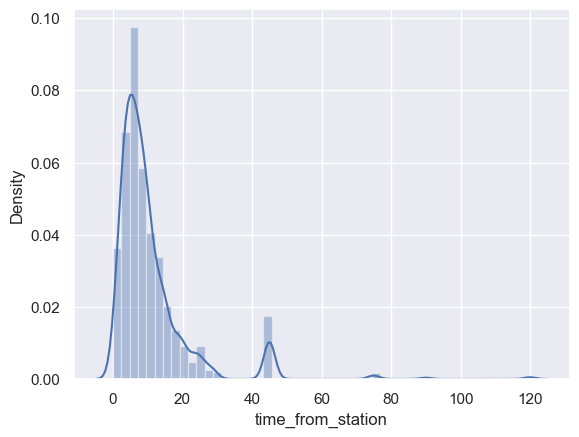

In [25]:
##それぞれのデータの確率密度関数を表示して分布を見る

sns.distplot(df_train_apartment_1['time_from_station'])

##対数正規分布っぽい時は、対数を取ると良い　今回は対数を取らないで分析する

/var/folders/yj/c6q__rvj7y79ltrr_bxk78mm0000gn/T/ipykernel_38674/3203933411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_apartment_1['year of construction'])


<Axes: xlabel='year of construction', ylabel='Density'>

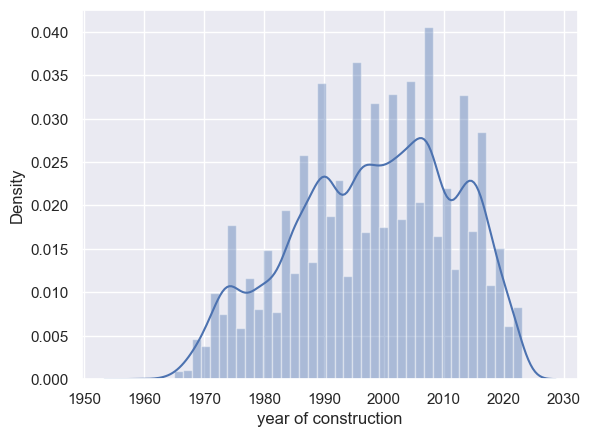

In [26]:
sns.distplot(df_train_apartment_1['year of construction'])

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


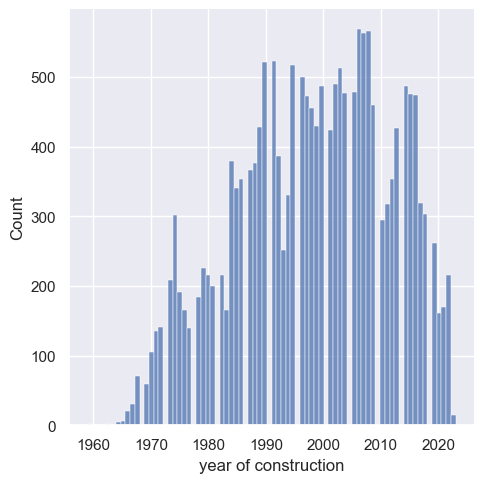

In [27]:
sns.displot(df_train_apartment_1['year of construction'],bins=78)

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


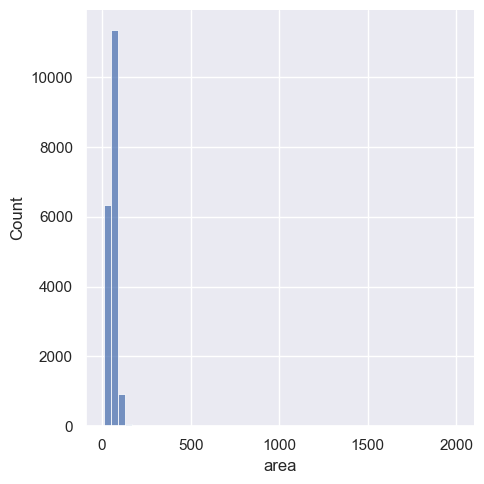

In [28]:
sns.displot(df_train_apartment_1['area'],bins=50)

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12410 (\N{HIRAGANA LETTER PE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from c

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24314 (\N{CJK UNIFIED IDEOGRAPH-5EFA}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12410 (\N{HIRAGANA LETTER PE}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/py

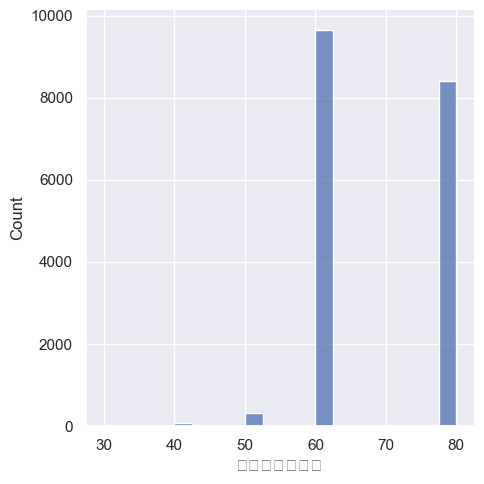

In [29]:
sns.displot(df_train_apartment_1['建ぺい率（％）'],bins=20)

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) m

/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 23481 (\N{CJK UNIFIED IDEOGRAPH-5BB9}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 31309 (\N{CJK UNIFIED IDEOGRAPH-7A4D}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/shishidoyuuta/ana

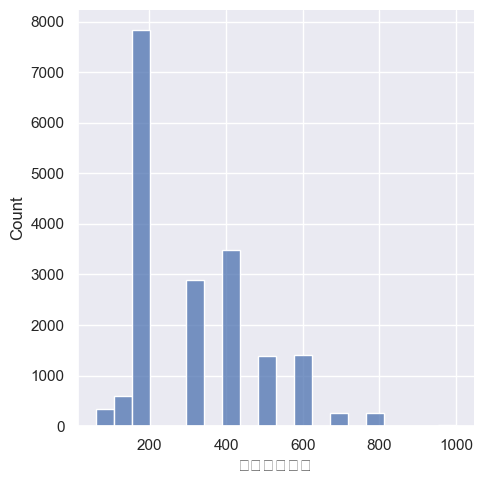

In [30]:
sns.displot(df_train_apartment_1['容積率（％）'],bins=20)

#流れとしては散布図を書いてなんとなくの相関を見てudemyを見る、その後ダミー変数を作り、そのダミー変数をグルーピングした後実際に
#multiple linear regressionをする

#ダミー変数を取得するもの　
地区→47都道府県では流石に多すぎるので、東北地方などいくつかまとめてグルーピングする
間取り→Sをどうにかして減らしたい



In [33]:
##間取りの要素とそれぞれどのくらいか
elements_count=df_train_apartment_1['間取り'].value_counts()

In [34]:
##Series objectに条件をのせる場合は後ろにただ[]をつけるだけで良い
delete_elements=elements_count[elements_count==1].index
df_train_apartment_1=df_train_apartment_1[~df_train_apartment_1['間取り'].isin(delete_elements)]
df_train_apartment_1['間取り'].value_counts()

##間取りのダミー変数に関してが保留　サービスルームに関しては無印と同じ枠にしてもいいかもしれない

間取り
３ＬＤＫ       6796
１Ｋ         3752
２ＬＤＫ       2889
４ＬＤＫ       1214
１ＬＤＫ       1112
２ＤＫ         515
１ＤＫ         511
１Ｒ          199
３ＤＫ         186
オープンフロア     107
２ＬＤＫ＋Ｓ       89
１ＬＤＫ＋Ｓ       37
２Ｋ           26
３ＬＤＫ＋Ｓ       25
４ＤＫ          22
３Ｋ           15
５ＬＤＫ         14
２ＤＫ＋Ｓ         5
３ＬＫ           3
１Ｋ＋Ｓ          3
４ＬＤＫ＋Ｓ        2
スタジオ          2
５ＤＫ           2
Name: count, dtype: int64

In [35]:
df_train_apartment_1['建物の構造'].value_counts()
##RC、ブロック造以下は決してダミー変数にする

建物の構造
ＲＣ            13100
ＳＲＣ            4795
鉄骨造             101
ＳＲＣ、ＲＣ           43
ＲＣ、鉄骨造           18
ＳＲＣ、鉄骨造           7
木造                4
軽量鉄骨造             1
ＳＲＣ、ＲＣ、鉄骨造        1
Name: count, dtype: int64

In [36]:
##改装の有無に関するダミー変数の設定
conversion_columns=pd.get_dummies(df_train_apartment['改装'])
conversion_columns.drop('未改装',axis=1,inplace=True)
conversion_columns.head(10)

,改装済
0,False
1,False
2,False
3,False
4,True
5,False
6,False
7,False
8,False
9,False


In [47]:
prefecture_columns=pd.get_dummies(df_train_apartment_1['都道府県名'],drop_first=True)
prefecture_columns.head(10)
##drop_firstで三重県が削ぎ落とされている

,京都府,佐賀県,兵庫県,北海道,千葉県,和歌山県,埼玉県,大分県,大阪府,奈良県,...,群馬県,茨城県,長崎県,長野県,青森県,静岡県,香川県,高知県,鳥取県,鹿児島県
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
prefecture_columns.loc[:,['北海道','青森県','秋田県','岩手県','宮城県','福島県']]

,北海道,青森県,秋田県,岩手県,宮城県,福島県
0,True,False,False,False,False,False
1,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
5,True,False,False,False,False,False
...,...,...,...,...,...,...
19256,False,False,False,False,False,False
19257,False,False,False,False,False,False
19258,False,False,False,False,False,False
19259,False,False,False,False,False,False


In [71]:
prefecture_columns.loc[:,['北海道','青森県','秋田県','岩手県','宮城県','福島県']].max(axis=1)

0         True
1         True
3         True
4         True
5         True
         ...  
19256    False
19257    False
19258    False
19259    False
19261    False
Length: 18707, dtype: bool

In [72]:
Hokkaido_Tohoku=prefecture_columns.loc[:,['北海道','青森県','秋田県','岩手県','宮城県','福島県']].max(axis=1).reset_index().drop('index',axis=1)
Kanto=prefecture_columns.loc[:,['茨城県','千葉県','栃木県','埼玉県','群馬県','東京都','神奈川県']].max(axis=1).reset_index().drop('index',axis=1)
Chubu=prefecture_columns.loc[:,['愛知県','静岡県','岐阜県','新潟県','長野県','山梨県','石川県','富山県']].max(axis=1).reset_index().drop('index',axis=1)
Kinki=prefecture_columns.loc[:,['滋賀県','京都府','大阪府','兵庫県','奈良県','和歌山県']].max(axis=1).reset_index().drop('index',axis=1)
Chugoku=prefecture_columns.loc[:,['鳥取県','島根県','岡山県','広島県','山口県']].max(axis=1).reset_index().drop('index',axis=1)
Sikoku=prefecture_columns.loc[:,['香川県','高知県','愛媛県','徳島県']].max(axis=1).reset_index().drop('index',axis=1)
Kyusyu=prefecture_columns.loc[:,['福岡県','大分県','佐賀県','熊本県','宮崎県','鹿児島県','長崎県','沖縄県']].max(axis=1).reset_index().drop('index',axis=1)

In [73]:
df_region=pd.concat([Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu],axis=1)
df_region.columns=['Hokkaido_Tohoku','Kanto','Chubu','Kinki','Chugoku','Sikoku','Kyusyu']
df_region=df_region.reset_index().drop('index',axis=1)
df_region

,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...
18702,False,False,False,False,False,False,True
18703,False,False,False,False,False,False,True
18704,False,False,False,False,False,False,True
18705,False,False,False,False,False,False,True


In [74]:
df_train_apartment_1=df_train_apartment_1.reset_index().drop('index',axis=1)
df_train_apartment_1

,都道府県名,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装
0,北海道,2,2012,３ＬＤＫ,100,ＲＣ,80.0,600.0,未改装
1,北海道,5,1984,NaN,30,ＳＲＣ,80.0,400.0,NaN
2,北海道,0,1977,１Ｒ＋Ｓ,35,ＳＲＣ,80.0,400.0,未改装
3,北海道,2,1981,３ＬＤＫ,70,ＲＣ,80.0,300.0,未改装
4,北海道,1,1985,３ＬＤＫ,70,ＳＲＣ,60.0,200.0,改装済
...,...,...,...,...,...,...,...,...,...
18712,沖縄県,16,1988,２ＬＤＫ,50,ＲＣ,60.0,200.0,改装済
18713,沖縄県,8,1986,２ＬＤＫ,55,ＲＣ,60.0,200.0,未改装
18714,沖縄県,8,1986,３ＬＤＫ,60,ＲＣ,60.0,200.0,改装済
18715,沖縄県,10,2015,３ＬＤＫ,75,ＲＣ,60.0,200.0,未改装


In [75]:
df_train_apartment_12=pd.concat([df_train_apartment_1,df_region],axis=1)
df_train_apartment_12=df_train_apartment_12.drop('都道府県名',axis=1)
df_train_apartment_12

,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu
0,2,2012,３ＬＤＫ,100,ＲＣ,80.0,600.0,未改装,True,False,False,False,False,False,False
1,5,1984,NaN,30,ＳＲＣ,80.0,400.0,NaN,True,False,False,False,False,False,False
2,0,1977,１Ｒ＋Ｓ,35,ＳＲＣ,80.0,400.0,未改装,True,False,False,False,False,False,False
3,2,1981,３ＬＤＫ,70,ＲＣ,80.0,300.0,未改装,True,False,False,False,False,False,False
4,1,1985,３ＬＤＫ,70,ＳＲＣ,60.0,200.0,改装済,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18712,16,1988,２ＬＤＫ,50,ＲＣ,60.0,200.0,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18713,8,1986,２ＬＤＫ,55,ＲＣ,60.0,200.0,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18714,8,1986,３ＬＤＫ,60,ＲＣ,60.0,200.0,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18715,10,2015,３ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df_train_apartment_1['建物の構造'].value_counts()
##RC、ブロック造以下は決してダミー変数にする

建物の構造
ＲＣ            13105
ＳＲＣ            4799
鉄骨造             101
ＳＲＣ、ＲＣ           44
ＲＣ、鉄骨造           18
ＳＲＣ、鉄骨造           7
木造                4
軽量鉄骨造             1
ＳＲＣ、ＲＣ、鉄骨造        1
Name: count, dtype: int64

In [77]:
df_train_apartment_12=df_train_apartment_12[~df_train_apartment_12['建物の構造'].isin(['ＲＣ、ブロック造','ＳＲＣ、ＲＣ、鉄骨造 ',\
                                                                            'ＲＣ、軽量鉄骨造','ＲＣ、木造'])]
df_train_apartment_12

,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu
0,2,2012,３ＬＤＫ,100,ＲＣ,80.0,600.0,未改装,True,False,False,False,False,False,False
1,5,1984,NaN,30,ＳＲＣ,80.0,400.0,NaN,True,False,False,False,False,False,False
2,0,1977,１Ｒ＋Ｓ,35,ＳＲＣ,80.0,400.0,未改装,True,False,False,False,False,False,False
3,2,1981,３ＬＤＫ,70,ＲＣ,80.0,300.0,未改装,True,False,False,False,False,False,False
4,1,1985,３ＬＤＫ,70,ＳＲＣ,60.0,200.0,改装済,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18712,16,1988,２ＬＤＫ,50,ＲＣ,60.0,200.0,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18713,8,1986,２ＬＤＫ,55,ＲＣ,60.0,200.0,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18714,8,1986,３ＬＤＫ,60,ＲＣ,60.0,200.0,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18715,10,2015,３ＬＤＫ,75,ＲＣ,60.0,200.0,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
building_columns=pd.get_dummies(df_train_apartment_12['建物の構造'],drop_first=True)
building_columns

,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造
0,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
18712,False,False,True,False,False,False,False,False
18713,False,False,True,False,False,False,False,False
18714,False,False,True,False,False,False,False,False
18715,False,False,True,False,False,False,False,False


In [79]:
df_train_apartment_13=pd.concat([df_train_apartment_12,building_columns],axis=1)
df_train_apartment_13.drop(['建物の構造'],axis=1)

,time_from_station,year of construction,間取り,area,建ぺい率（％）,容積率（％）,改装,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造
0,2,2012,３ＬＤＫ,100,80.0,600.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,5,1984,NaN,30,80.0,400.0,NaN,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0,1977,１Ｒ＋Ｓ,35,80.0,400.0,未改装,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,2,1981,３ＬＤＫ,70,80.0,300.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,1,1985,３ＬＤＫ,70,60.0,200.0,改装済,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18712,16,1988,２ＬＤＫ,50,60.0,200.0,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False
18713,8,1986,２ＬＤＫ,55,60.0,200.0,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False
18714,8,1986,３ＬＤＫ,60,60.0,200.0,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False
18715,10,2015,３ＬＤＫ,75,60.0,200.0,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,False,False,False,False


In [80]:
##改装に関するダミー変数は最終的にデータを加工したdf_train_apartment_13で行ってから
##間取りの数値化に関してどのような方法があるか

In [81]:
##改装の有無に関するダミー変数の設定
conversion_columns=pd.get_dummies(df_train_apartment_13['改装'])
conversion_columns.drop('未改装',axis=1,inplace=True)
conversion_columns

,改装済
0,False
1,False
2,False
3,False
4,True
...,...
18712,True
18713,False
18714,True
18715,False


In [82]:
##Series objectに条件をのせる場合は後ろにただ[]をつけるだけで良い

shape_count=df_train_apartment_13['間取り'].value_counts()

##間取りのダミー変数に関してが保留　サービスルームに関しては無印と同じ枠にしてもいいかもしれない

In [83]:
#要素が10以上の項目だけ抽出する
new_roomshape=df_train_apartment

In [84]:
##replaceで複数の置換を行う場合は、辞書型のメソッドを使う
pd.options.display.max_rows=70
replace_elements={'１ＬＤＫ＋Ｓ':'１ＬＤＫ','２ＬＤＫ＋Ｓ':'２ＬＤＫ','３ＬＤＫ＋Ｓ':'３ＬＤＫ','４ＬＤＫ＋Ｓ':'４ＬＤＫ','５ＬＤＫ＋Ｓ':'５ＬＤＫ','６ＬＤＫ＋Ｓ':'６ＬＤＫ'\
                 ,'１ＤＫ＋Ｓ':'１ＤＫ','２ＤＫ＋Ｓ':'２ＤＫ','３ＤＫ＋Ｓ':'３ＤＫ','４ＤＫ＋Ｓ':'４ＤＫ','５ＤＫ＋Ｓ':'５ＤＫ','１Ｒ＋Ｓ':'１Ｒ'\
                 ,'１Ｋ＋Ｓ':'１Ｋ','２Ｋ＋Ｓ':'２Ｋ','３Ｋ＋Ｓ':'３Ｋ','４Ｋ＋Ｓ':'４Ｋ','５Ｋ＋Ｓ':'５Ｋ'\
                 ,'２ＬＤＫ＋Ｋ':'２ＬＤＫ','３ＬＤＫ＋Ｋ':'３ＬＤＫ','４ＬＤＫ＋Ｋ':'４ＬＤＫ'\
                 ,'２ＬＫ＋Ｓ':'２ＬＫ','３ＬＤ＋Ｓ':'３ＬＤ'}
df_train_apartment_13['間取り']=df_train_apartment_13['間取り'].replace(replace_elements)


In [85]:
new_roomshape=df_train_apartment_13['間取り'].value_counts()

In [86]:
delete_element=new_roomshape[new_roomshape<10].index
df_train_apartment_13=df_train_apartment_13[~df_train_apartment_13['間取り'].isin(delete_element)]
df_train_apartment_13.head(10)

,time_from_station,year of construction,間取り,area,建物の構造,建ぺい率（％）,容積率（％）,改装,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,鉄骨造,ＲＣ,ＲＣ、鉄骨造,ＳＲＣ,ＳＲＣ、鉄骨造,ＳＲＣ、ＲＣ,ＳＲＣ、ＲＣ、鉄骨造
0,2,2012,３ＬＤＫ,100,ＲＣ,80.0,600.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,5,1984,NaN,30,ＳＲＣ,80.0,400.0,NaN,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0,1977,１Ｒ,35,ＳＲＣ,80.0,400.0,未改装,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,2,1981,３ＬＤＫ,70,ＲＣ,80.0,300.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,1,1985,３ＬＤＫ,70,ＳＲＣ,60.0,200.0,改装済,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
5,1,1991,１Ｒ,15,ＳＲＣ,80.0,300.0,NaN,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
6,6,1990,１Ｋ,15,ＲＣ,80.0,300.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,5,2019,２ＬＤＫ,100,ＲＣ,NaN,NaN,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
8,2,2005,３ＬＤＫ,100,ＲＣ,60.0,200.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,1,2015,３ＬＤＫ,80,ＲＣ,80.0,400.0,未改装,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [87]:
df_train_apartment_14=pd.concat([df_train_apartment_13,conversion_columns],axis=1)
df_train_apartment_14.drop('改装',axis=1,inplace=True)

In [88]:
building_structure_columns=pd.get_dummies(df_train_apartment_14['間取り'],drop_first=True)
building_structure_columns

,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ,５ＬＤＫ
0,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15400,False,False,False,False,False,False,False,False,False,False,False,False,False
15541,False,False,False,False,False,False,False,False,False,False,False,False,False
17165,False,False,False,False,False,False,False,False,False,False,False,False,False
17437,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
df_train_apartment_15=pd.concat([df_train_apartment_14,building_structure_columns],axis=1)
df_train_apartment_15.drop(['間取り','建物の構造'],axis=True,inplace=True)
df_train_apartment_15.head(10)

,time_from_station,year of construction,area,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,...,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ,５ＬＤＫ
0,2.0,2012.0,100,80.0,600.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
1,5.0,1984.0,30,80.0,400.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,1977.0,35,80.0,400.0,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False
3,2.0,1981.0,70,80.0,300.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
4,1.0,1985.0,70,60.0,200.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
5,1.0,1991.0,15,80.0,300.0,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False
6,6.0,1990.0,15,80.0,300.0,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False
7,5.0,2019.0,100,NaN,NaN,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False
8,2.0,2005.0,100,60.0,200.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
9,1.0,2015.0,80,80.0,400.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False


In [90]:
df_train_apartment_15['建ぺい率（％）'].fillna(df_train_apartment_15['建ぺい率（％）'].mean(),inplace=True)

In [91]:
df_train_apartment_15['容積率（％）'].fillna(df_train_apartment_15['容積率（％）'].mean(),inplace=True)

In [92]:
df_train_apartment_15.head(10)

,time_from_station,year of construction,area,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,...,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ,５ＬＤＫ
0,2.0,2012.0,100,80.000000,600.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
1,5.0,1984.0,30,80.000000,400.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,1977.0,35,80.000000,400.000000,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False
3,2.0,1981.0,70,80.000000,300.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
4,1.0,1985.0,70,60.000000,200.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
5,1.0,1991.0,15,80.000000,300.000000,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False
6,6.0,1990.0,15,80.000000,300.000000,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False
7,5.0,2019.0,100,68.831106,319.441528,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False
8,2.0,2005.0,100,60.000000,200.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
9,1.0,2015.0,80,80.000000,400.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False


In [93]:
df_train_apartment_15['building_age']=2023-df_train_apartment_15['year of construction']
df_train_apartment_15.drop('year of construction',axis=1,inplace=True)
df_train_apartment_15.head(10)

,time_from_station,area,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,鉄骨造,...,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ,５ＬＤＫ,building_age
0,2.0,100,80.000000,600.000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,11.0
1,5.0,30,80.000000,400.000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,39.0
2,0.0,35,80.000000,400.000000,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,46.0
3,2.0,70,80.000000,300.000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,42.0
4,1.0,70,60.000000,200.000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,38.0
5,1.0,15,80.000000,300.000000,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,False,False,32.0
6,6.0,15,80.000000,300.000000,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,33.0
7,5.0,100,68.831106,319.441528,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,False,4.0
8,2.0,100,60.000000,200.000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,18.0
9,1.0,80,80.000000,400.000000,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,8.0


In [ ]:
##建設の年ではなくて築年数いしたほうが良いのでは？
##建蔽率と容積率を平均値で埋める？

In [95]:
df_train_apartment_15.columns.values

array(['time_from_station', 'area', '建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', '１ＤＫ', '１Ｋ', '１ＬＤＫ', '１Ｒ', '２ＤＫ',
       '２Ｋ', '２ＬＤＫ', '３ＤＫ', '３Ｋ', '３ＬＤＫ', '４ＤＫ', '４ＬＤＫ', '５ＬＤＫ',
       'building_age'], dtype=object)

In [101]:
df_train_apartment_16=df_train_apartment_15[['time_from_station', 'area','building_age','建ぺい率（％）', '容積率（％）',
       'Hokkaido_Tohoku', 'Kanto', 'Chubu', 'Kinki', 'Chugoku', 'Sikoku',
       'Kyusyu', '軽量鉄骨造', '鉄骨造', 'ＲＣ', 'ＲＣ、鉄骨造', 'ＳＲＣ', 'ＳＲＣ、鉄骨造',
       'ＳＲＣ、ＲＣ', 'ＳＲＣ、ＲＣ、鉄骨造', '改装済', '１ＤＫ', '１Ｋ',
       '１ＬＤＫ','１Ｒ', '２ＤＫ', '２Ｋ','２ＬＤＫ','３ＤＫ',
       '３Ｋ', '３ＬＤＫ', '４ＤＫ','４ＬＤＫ','５ＬＤＫ']]
df_train_apartment_16.head(10)

,time_from_station,area,building_age,建ぺい率（％）,容積率（％）,Hokkaido_Tohoku,Kanto,Chubu,Kinki,Chugoku,Sikoku,Kyusyu,軽量鉄骨造,...,１ＤＫ,１Ｋ,１ＬＤＫ,１Ｒ,２ＤＫ,２Ｋ,２ＬＤＫ,３ＤＫ,３Ｋ,３ＬＤＫ,４ＤＫ,４ＬＤＫ,５ＬＤＫ
0,2.0,100,11.0,80.000000,600.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
1,5.0,30,39.0,80.000000,400.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.0,35,46.0,80.000000,400.000000,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False
3,2.0,70,42.0,80.000000,300.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
4,1.0,70,38.0,60.000000,200.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
5,1.0,15,32.0,80.000000,300.000000,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False
6,6.0,15,33.0,80.000000,300.000000,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False
7,5.0,100,4.0,68.831106,319.441528,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False
8,2.0,100,18.0,60.000000,200.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False
9,1.0,80,8.0,80.000000,400.000000,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,False,False


In [102]:
df_train_apartment_15.shape

(18717, 34)

In [103]:
##一旦csvファイルとして出力する

In [106]:
df_train_apartment_16.isnull().sum()

time_from_station    14
area                 14
building_age         14
建ぺい率（％）               0
容積率（％）                0
Hokkaido_Tohoku      24
Kanto                24
Chubu                24
Kinki                24
Chugoku              24
Sikoku               24
Kyusyu               24
軽量鉄骨造                14
鉄骨造                  14
ＲＣ                   14
ＲＣ、鉄骨造               14
ＳＲＣ                  14
ＳＲＣ、鉄骨造              14
ＳＲＣ、ＲＣ               14
ＳＲＣ、ＲＣ、鉄骨造           14
改装済                   0
１ＤＫ                   0
１Ｋ                    0
１ＬＤＫ                  0
１Ｒ                    0
２ＤＫ                   0
２Ｋ                    0
２ＬＤＫ                  0
３ＤＫ                   0
３Ｋ                    0
３ＬＤＫ                  0
４ＤＫ                   0
４ＬＤＫ                  0
５ＬＤＫ                  0
dtype: int64

In [107]:
df_train_apartment_16=df_train_apartment_16.dropna().copy()

In [109]:
df_train_apartment_16.to_csv('processed_test_data.csv',index=False)